## Creating more complex computational graphs

Now let's take a look on more complex computational graphs, where we will repeat the same set of pictures but using deeper and wider neural networks.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

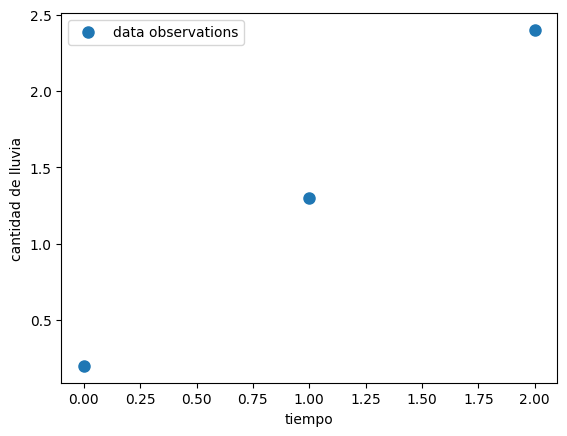

In [2]:
## =============== ##
## Define our data ##
## =============== ##

# input to our model. Represents time in seconds
x_data = np.array([0,1,2]).reshape(3,1)
# outputs associated to each input. Represents cantidad de lluvia in mm^3
t_data = np.array([0.2,1.3,2.4]).reshape(3,1)

## display
plt.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
plt.xlabel('tiempo')
plt.ylabel('cantidad de lluvia')
plt.legend()

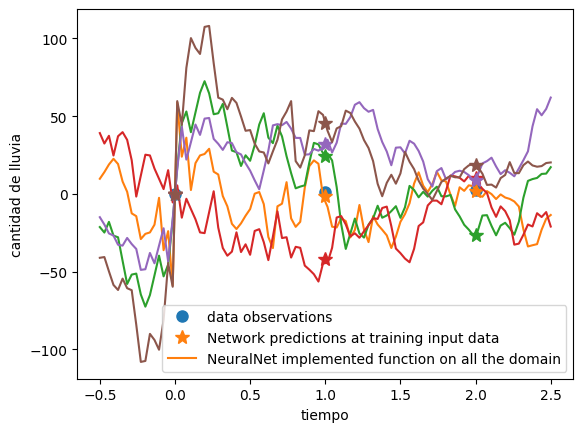

In [3]:
## ================================================================== ##
## display possible functions depending on the type of neural network ##
## ================================================================== ##

## fix seed so that randomness is controlled.
np.random.seed(5)

## number of points in the domain used to plot the functions 
N_points_domain = 100

## display data again
plt.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
plt.xlabel('tiempo')
plt.ylabel('cantidad de lluvia')

## function implementing an activation function
def activation_function_linear(x):
    return x

## relu activation function
def activation_function_relu(x):
    return np.maximum(0,x)

## hyperbolic tangent
def activation_function_tanh(x):
    return np.tanh(x)

## sigmoid activation function
def activation_function_sigmoid(x):
    return 1/(1 + np.exp(-x))
    
## function that implements the computational graph
def computation_graph(x : np.array, parameters):
    ''' This function represents a computational graph, a neural network, that implements a general fully connected model.

    Parameters is a list of tuples, where first element in the tuple is the weight matrix, second is the bias from the linear
    layer, and third is the activation function pointer
    '''
    for w,b,activation in parameters:
        x = activation(np.matmul(x,w) + b)
    return x


## function that initializes the values of a computational graph
def create_computation_graph(n_in:int, n_out: int, neurons_per_hidden_layer : int, num_hidden_layers:int, activation_hidden : str):
    ''' Create elements of the computational graph'''
    parameters = []
    for i in range(num_hidden_layers):
        ## first layer is different since we project from n_in neurons at input layer
        if i == 0:
            # parameters (linear projection)
            w = np.random.randn(n_in,neurons_per_hidden_layer) # get a random value from standard normal distribution
            b = 0 #np.random.randn(neurons_per_hidden_layer,)*5 # get a random value from Gaussian with mean 0 and standard deviation 5.
        else:
            # parameters (linear projection)
            w = np.random.randn(neurons_per_hidden_layer,neurons_per_hidden_layer) 
            b = 0 #np.random.randn(neurons_per_hidden_layer,)*5 
            
        if activation_hidden == 'relu':
            activation_pointer = activation_function_relu
            
        elif activation_hidden == 'linear':
            activation_pointer = activation_function_linear

        elif activation_hidden == 'tanh':
            activation_pointer = activation_function_tanh
        
        elif activation_hidden == 'sigmoid':
            activation_pointer = activation_function_sigmoid

        else:
            raise ValueError(f"Unknown activation f{activation_hidden}")
        
        parameters.append((w,b,activation_pointer))

    ## append output layer projection
    w = np.random.randn(neurons_per_hidden_layer,n_out) 
    b = 0 #np.random.randn(n_out,)
    activation_pointer = activation_function_linear
    
    parameters.append((w,b,activation_pointer))
    
    return parameters

## function that initializes the values of a computational graph
def create_computation_graph_fixing_weights(n_in:int, n_out: int, neurons_per_hidden_layer : int, num_hidden_layers:int, activation_hidden : str):
    ''' Create elements of the computational graph by fixing all elements except one'''
    ## generator for all common parameters
    generator = np.random.default_rng(0)
    parameters = []
    for i in range(num_hidden_layers):
        ## first layer is different since we project from n_in neurons at input layer
        if i == 0:
            # parameters (linear projection)
            w = generator.standard_normal((n_in,neurons_per_hidden_layer)) # get a random value from standard normal distribution
            
            # vary one of the parameters which is the one we will look at when plotting loss function
            w[0,0] = float(np.random.randn(1,1)*5)
            
            b = 0 
        else:
            # parameters (linear projection)
            w = generator.standard_normal((neurons_per_hidden_layer,neurons_per_hidden_layer)) 
            b = 0 
            
        if activation_hidden == 'relu':
            activation_pointer = activation_function_relu
            
        elif activation_hidden == 'linear':
            activation_pointer = activation_function_linear

        elif activation_hidden == 'tanh':
            activation_pointer = activation_function_tanh
        
        elif activation_hidden == 'sigmoid':
            activation_pointer = activation_function_sigmoid

        else:
            raise ValueError(f"Unknown activation f{activation_hidden}")
        
        parameters.append((w,b,activation_pointer))

    ## append output layer projection
    w = generator.standard_normal((neurons_per_hidden_layer,n_out))

    '''
    # vary one of the parameters which is the one we will look at when plotting loss function
    w[0,0] = float(np.random.randn(1,1)*5)
    '''
    b = 0 
    activation_pointer = activation_function_linear
    
    parameters.append((w,b,activation_pointer))
    
    return parameters

## ===========================================
## Neural network specification for each layer

# neurons of input layer
n_in = 1
# number of hidden layers and neurons per hidden layer
num_hidden = 4 # 4
num_neurons = 1024 # 10 or 128 
activation_hidden = 'tanh'
# neurons of output layer
n_out = 1

## ================================================================================
## Create several possible functions that our specific neural network can implement
for i in range(5):

    # domain over where we want to plot the function implemented by the NNet
    x_range = np.linspace(-0.5,2.5, N_points_domain).reshape((N_points_domain,1))

    # initialize one of our networks
    parameters = create_computation_graph(
                        n_in = n_in, 
                        n_out = n_out, 
                        neurons_per_hidden_layer = num_neurons, 
                        num_hidden_layers  = num_hidden, 
                        activation_hidden = activation_hidden )

    # projection from input x to output y through computational graph
    y_range = computation_graph(x_range,parameters)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_pred = computation_graph(x_data,parameters)

    if i == 0:
        plt.plot(x_data, y_pred,'*', markersize = 10, color = f"C{i+1}", label = 'Network predictions at training input data')
        plt.plot(x_range,y_range, color = f"C{i+1}", label = 'NeuralNet implemented function on all the domain' )
    else:
        plt.plot(x_data, y_pred,'*', markersize = 10,  color = f"C{i+1}")
        plt.plot(x_range,y_range, color = f"C{i+1}")

plt.legend()

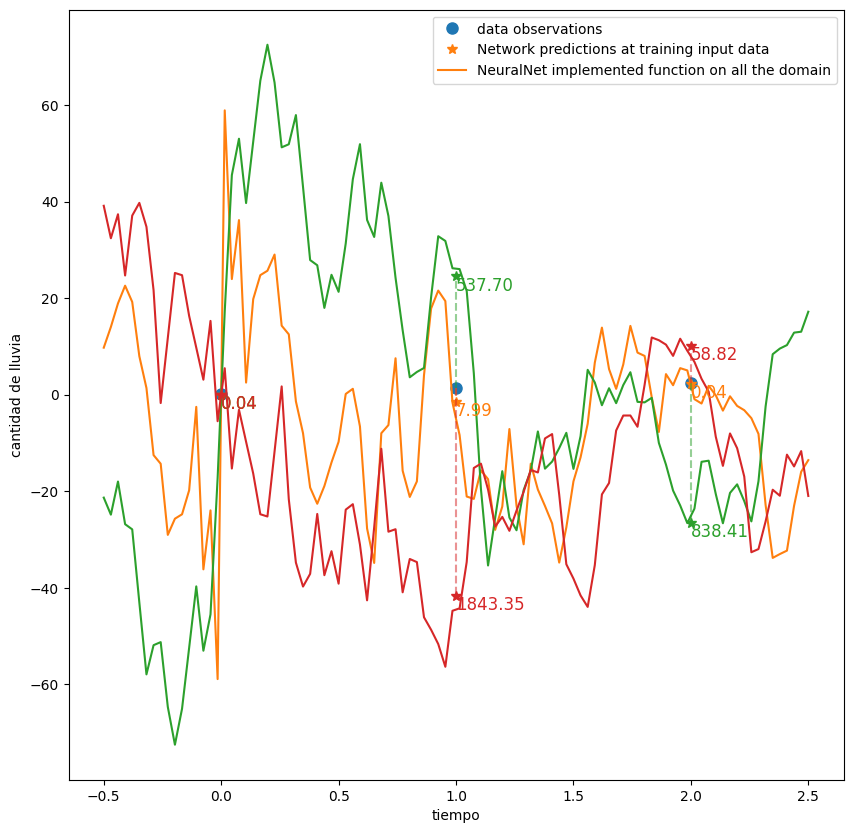

In [4]:
## ====================================== ##
## display loss of each possible function ##
## ====================================== ##
## Let's see the associated loss to each possible function and each prediction of this function at the training points.
## We show two different losses: squared (top) and absolute ( bottom )
## I repeat code from above but computing and plotting the loss.

# which loss is plotted
plot_squared_loss = True # when false plot absolute loss

## function implementing squared loss function
def squared_loss_function(y_pred,t):
    return (y_pred-t)**2

def absolute_loss_function(y_pred,t):
    return np.abs(y_pred-t)

## fix seed so that randomness is controlled.
np.random.seed(5)

## number of points in the domain used to plot the functions 
N_points_domain = 100

## display data again
plt.figure(figsize = (10,10))
plt.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
plt.xlabel('tiempo')
plt.ylabel('cantidad de lluvia')

## ================================================================================
## Create several possible functions that our specific neural network can implement
for i in range(3):

    # domain over where we want to plot the function implemented by the NNet
    x_range = np.linspace(-0.5,2.5, N_points_domain).reshape((N_points_domain,1))

    # initialize one of our networks
    parameters = create_computation_graph(
                        n_in = n_in, 
                        n_out = n_out, 
                        neurons_per_hidden_layer = num_neurons, 
                        num_hidden_layers  = num_hidden, 
                        activation_hidden = activation_hidden )

    # projection from input x to output y through computational graph
    y_range = computation_graph(x_range,parameters)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_pred = computation_graph(x_data,parameters)

    # compute the two losses at the predictions
    squared_loss = squared_loss_function(y_pred, t_data)
    absolute_loss = absolute_loss_function(y_pred, t_data)

    if i == 0:
        plt.plot(x_data, y_pred,'*', markersize = 7, color = f"C{i+1}", label = 'Network predictions at training input data')
        plt.plot(x_range,y_range, color = f"C{i+1}", label = 'NeuralNet implemented function on all the domain' )
      
    else:
        plt.plot(x_data, y_pred,'*', markersize = 7,  color = f"C{i+1}")
        plt.plot(x_range,y_range, color = f"C{i+1}")

    if plot_squared_loss:
        ## plot squared loss associated at each point
        for xi, yi, sl in zip(x_data,y_pred,squared_loss):
            plt.text(xi, yi, f'{sl[0]:.2f}', fontsize=12, va='top', color = f"C{i+1}" ) 
    else:
        ## plot absolute loss associated at each point
        for xi, yi, sl in zip(x_data,y_pred,absolute_loss):
            plt.text(xi, yi, f'{sl[0]:.2f}', fontsize=12, va='bottom', color = f"C{i+1}" ) 

    # draw line between dots to highliht what the loss measures
    for xi,t_d,y_p in zip(x_data,t_data,y_pred):
        plt.plot([xi,xi], [t_d, y_p], '--',color = f"C{i+1}", alpha = 0.5)

plt.legend()

Text(0, 0.5, 'absolute loss function')

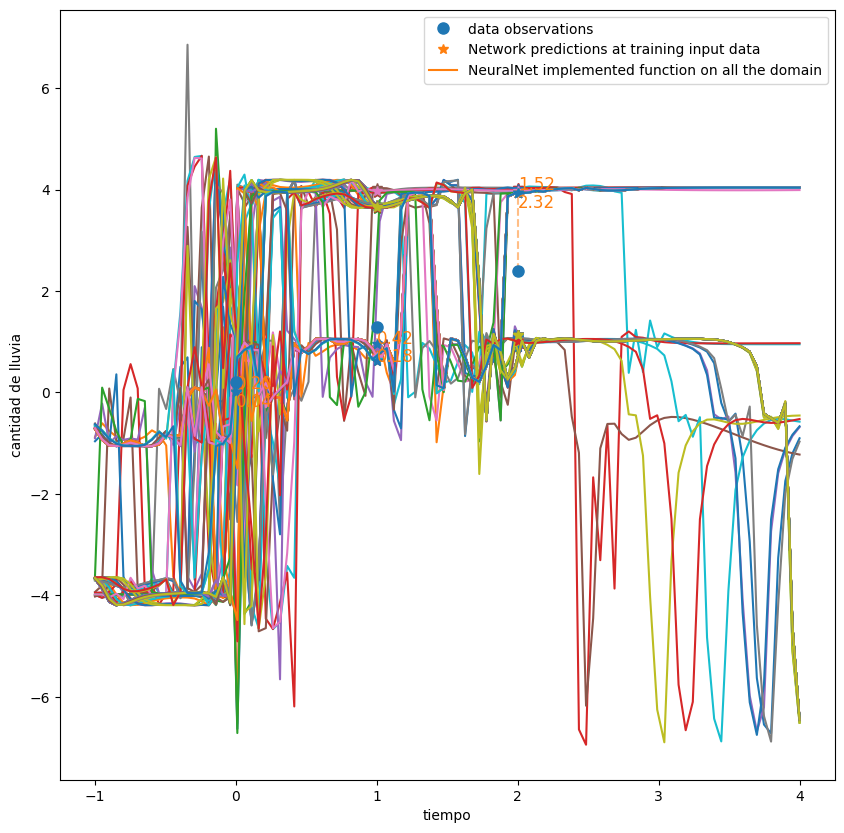

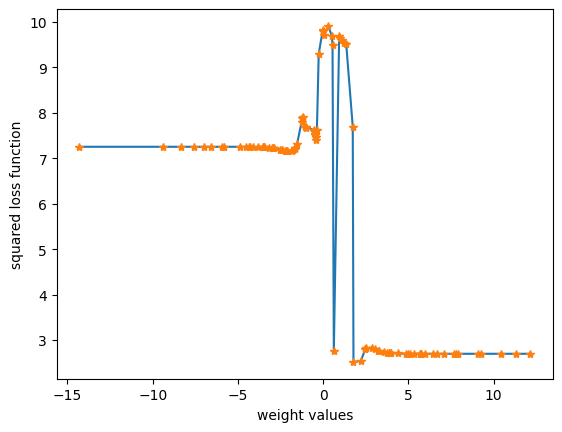

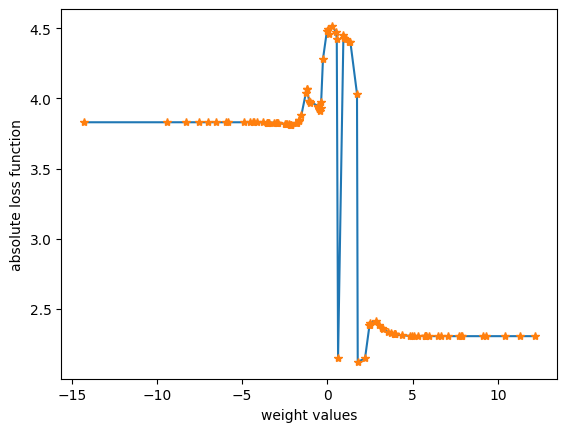

In [7]:
## ======================================================================== ##
## display loss as a function of parameters (loss incurred by each network) ##
## ======================================================================== ##
## Let's see the associated loss to each possible function but seeing the loss
## as a function of the parameters.
## We show two different losses: squared (top) and absolute ( bottom )
## I repeat code from above but computing and plotting the loss.
## I need to fix all the parameters to a value except one that it is varied.

## function implementing squared loss function
def squared_loss_function(y_pred,t):
    return (y_pred-t)**2

def absolute_loss_function(y_pred,t):
    return np.abs(y_pred-t)

## fix seed so that randomness is controlled.
np.random.seed(5)

# neurons of input layer
n_in = 1
## Number of hidden layers and neurons per hidden layer
# Interesting configs:
# (20 hidden , 10 neurons, relu, plot w[0,0] from first layer)
# (20 hidden , 10 neurons, tanh, plot w[0,0] from first layer)
# (4 hidden , 10 neurons, tanh, plot w[0,0] from first layer)
# (4 hidden , 128 neurons, tanh, plot w[0,0] from first layer)
num_hidden = 20 # 4
num_neurons = 10 # 10 or 128 
activation_hidden = 'tanh'
# neurons of output layer
n_out = 1

## number of points in the domain used to plot the functions 
N_points_domain = 100

## display data again
plt.figure(figsize = (10,10))
plt.plot(x_data,t_data,'o', markersize = 8, label = 'data observations', zorder = 200)
plt.xlabel('tiempo')
plt.ylabel('cantidad de lluvia')

## ================================================================================
## Create several possible functions that our specific neural network can implement
squared_loss_acc = []
absolute_loss_acc = []
w_acc = []
for i in range(100):

    # domain over where we want to plot the function implemented by the NNet
    x_range = np.linspace(-1,4, N_points_domain).reshape((N_points_domain,1))

     # initialize one of our networks
    parameters = create_computation_graph_fixing_weights(
                        n_in = n_in, 
                        n_out = n_out, 
                        neurons_per_hidden_layer = num_neurons, 
                        num_hidden_layers  = num_hidden, 
                        activation_hidden = activation_hidden )

    # projection from input x to output y through computational graph
    y_range = computation_graph(x_range,parameters)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_pred = computation_graph(x_data,parameters)

    # compute the two losses at the predictions
    squared_loss = squared_loss_function(y_pred, t_data)
    absolute_loss = absolute_loss_function(y_pred, t_data)

    # acumulate loss and parameter used
    squared_loss_acc.append(np.sum(squared_loss))
    absolute_loss_acc.append(np.sum(absolute_loss))
    # save the last parameter which is the one that we plot against loss function
    w,_,_ = parameters[0]
    w_acc.append(np.squeeze(w[0,0]))

    if i == 0:
        plt.plot(x_data, y_pred,'*', markersize = 7, color = f"C{i+1}", label = 'Network predictions at training input data')
        plt.plot(x_range,y_range, color = f"C{i+1}", label = 'NeuralNet implemented function on all the domain' )
      
    else:
        plt.plot(x_data, y_pred,'*', markersize = 7,  color = f"C{i+1}")
        plt.plot(x_range,y_range, color = f"C{i+1}")

    # plot loss associated to just first three lines to see it better.
    if i == 0:
        
        ## plot squared loss associated at each point
        for xi, yi, sl in zip(x_data,y_pred,squared_loss):
            plt.text(xi, yi, f'{sl[0]:.2f}', fontsize=12, va='top', color = f"C{i+1}" ) 
            
        ## plot absolute loss associated at each point
        for xi, yi, sl in zip(x_data,y_pred,absolute_loss):
            plt.text(xi, yi, f'{sl[0]:.2f}', fontsize=12, va='bottom', color = f"C{i+1}" ) 
    
        # draw line between dots to highliht what the loss measures
        for xi,t_d,y_p in zip(x_data,t_data,y_pred):
            plt.plot([xi,xi], [t_d, y_p], '--',color = f"C{i+1}", alpha = 0.5)

plt.legend()


plt.figure()
# sort w_acc
idx = np.argsort(w_acc)

plt.plot(np.array(w_acc)[idx], np.array(squared_loss_acc)[idx])
plt.plot(np.array(w_acc)[idx], np.array(squared_loss_acc)[idx],'*')
plt.xlabel('weight values')
plt.ylabel('squared loss function')
# print('\n\n Squared loss \n\n', np.array(squared_loss_acc)[idx].tolist())

plt.figure()
plt.plot(np.array(w_acc)[idx], np.array(absolute_loss_acc)[idx])
plt.plot(np.array(w_acc)[idx], np.array(absolute_loss_acc)[idx],'*')
plt.xlabel('weight values')
plt.ylabel('absolute loss function')
# print('\n\n Absolute loss \n\n {:.2f}', np.array(absolute_loss_acc)[idx].tolist())